# Customer Churn Prediction

### What is Customer churn?

Churn quantifies the number of customers who have unsubscribed or canceled their service contract.
Customer churn (or customer attrition) is a tendency of customers to abandon a brand and stop being a paying client of a particular business.Customer retention is one of the primary growth pillars for products with a subscription-based business model like telecommunication.

### We will use five steps to Predict Customer Churn 

- Understanding the Problem 
- Reading and understanding the data 
- Data Pre-processing and visualisation
- Modeling
- Generate Insight

### Objective : 

In this notebook will develop a model for predicting customer churn at a fictitious wireless telecom company and use insights from the model to develop an incentive plan for enticing would-be churners to remain with company. 
We will also look at data from customers that already have churned (response) and their characteristics / behaviour (predictors) before the churn happened. By fitting a statistical model that relates the predictors to the response, we will try to predict the response for existing customers. This method is called Supervised Learning.

### About Dataset : 

The dataset is from anonymous wireless telephone company.
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
There are total 7043 rows and 21 Columns in the dataset.

### Features of the dataset

- customerID
- gender
- SeniorCitizen
- Partner
- Dependants
- tenure
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- TechSupport
- DeviceProtection
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- MonthlyCharges
- TotalCharges
- Churn











### Importing the data

In [1]:
# Lets First Import the Required the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics

In [2]:
# Loading the Dataset
churn_df = pd.read_csv("Churn.csv")
churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# Lets just check to confirm that our data is stored as dataframe
type(churn_df)

pandas.core.frame.DataFrame

### Understanding the data


#### Let's understand some basic strucutre of our data. 

In [4]:
# using info() method to get the concise summary of the dataframe.
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In above summary We can see that there are total 7043 rows and 21 columns present in the dataset. the summary also includes list of all columns with their data types(in this case we have 3 different datatypes-float64(1), int64(2) and object(18)) and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis.

#### Checking some statistical details of the dataset

In [5]:
# using describe() method to check some statistical information about the data.
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Exploratory data analysis and Data Visualization

Let's try to explore and visualize our data set by doing distribution of independent varialbes to better understand the patterns in the data and to potentially form some hypothesis.

### Customer Gender Distribution

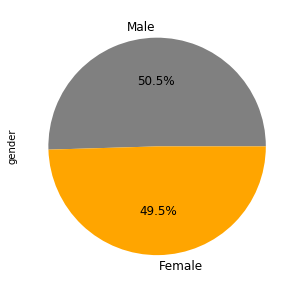

In [9]:
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
colors = ['grey','orange']
ax = (churn_df['gender'].value_counts()*100.0 /len(churn_df)).plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'],figsize =(5,5), fontsize = 12,colors = colors )

###### Gender distribution shows that the dataset features a relatively equal proportion of male and female customers. Almost half of the customers in our dataset our female while the other half are male. 

### Customer Age Distribution

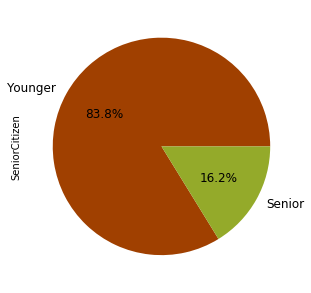

In [39]:
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
colors = ['#A04000','#94aa2a']
ax = (churn_df['SeniorCitizen'].value_counts()*100.0 /len(churn_df)).plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'],figsize =(5,5), fontsize = 12,colors = colors )

##### from above plot we can infer that Most of the customers in the dataset are the younger people.

### Distribution of customer contract type 

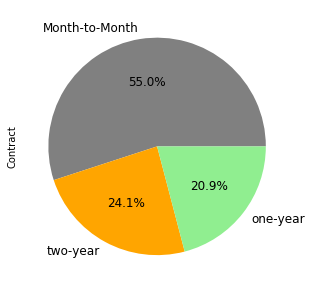

In [45]:
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
colors = ['grey','orange','lightgreen']
ax = (churn_df['Contract'].value_counts()*100.0 /len(churn_df)).plot.pie(autopct='%.1f%%', labels = ['Month-to-Month', 'two-year','one-year'],figsize =(5,5), fontsize = 12,colors = colors )

##### Most of the customers seems to have a prepaid connection with the telecom company. on the other hand, there are almost equal proportion of customers in 1-year and 2-year contracts.

### Distribution of Paperless billing

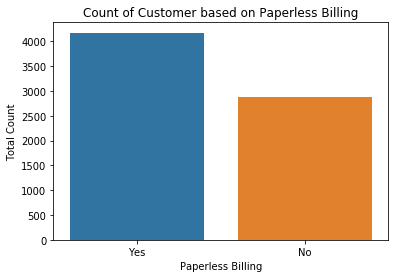

In [57]:
plt.figure(figsize=(6,4))
g = sns.countplot(churn_df.PaperlessBilling);
plt.title("Count of Customer based on Paperless Billing")
plt.xlabel("Paperless Billing")
plt.ylabel("Total Count")
plt.show()

### Distribution of Services and Count of customer Availing the Services 

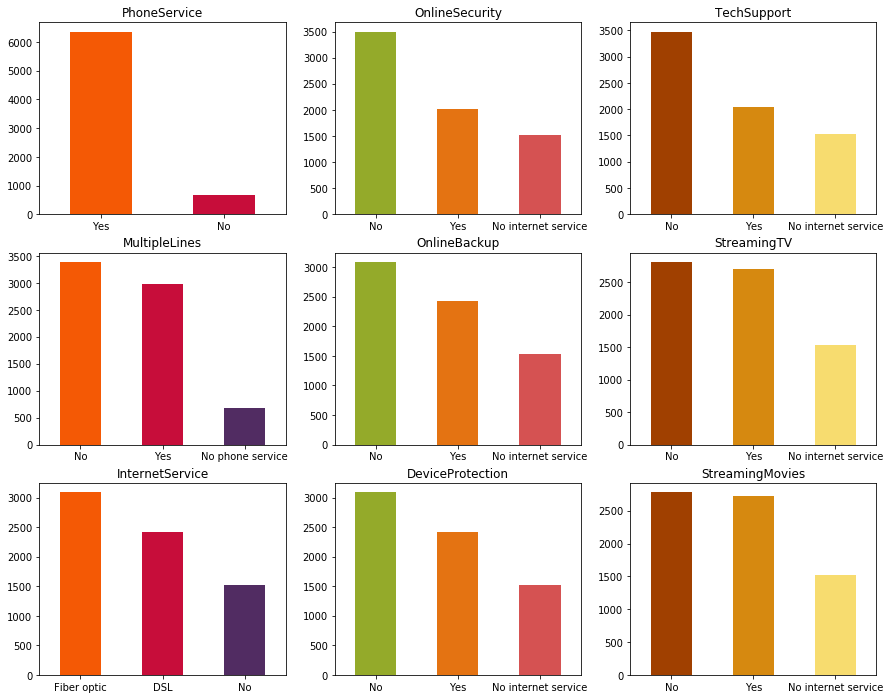

In [37]:
features = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
colors1 =['#f45905','#c70d3a','#512c62']
colors2 =['#94aa2a','#e47312','#d55252']
colors3= ['#A04000','#D68910','#F7DC6F']
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(features):
    if i < 3:
        ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color=colors1)
        
    elif i >=3 and i < 6:
        ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color = colors2)
        
    elif i < 9:
        ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color=colors3)
    ax.set_title(item)

#### Observation from above plots: 

Most of the customers have Phone service out of which almost half of the customers have multiple lines.

3/4th of the customers have opted for internet service via Fiber optic and DSL Connections with almost half of the internet users subscribing to streaming TV and Movies.

customers who have availed online backup, Device Protection, Technical Support and Online Security features are comparitively less. 

### Distribution of Churn Rate

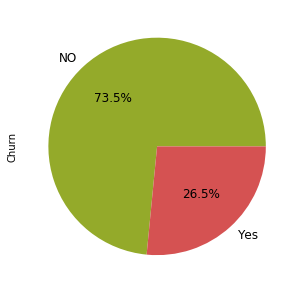

In [11]:
a4_dims = (11.7, 8.27)
ax = plt.subplots(figsize=a4_dims)
colors = ['#94aa2a','#d55252']
ax = (churn_df['Churn'].value_counts()*100.0 /len(churn_df)).plot.pie(autopct='%.1f%%', labels = ['NO', 'Yes'],figsize =(5,5), fontsize = 12,colors = colors )

##### Overall churn rate shows that around 74% of the customers are active with companies subscription.

### Distribution for Monthly Charges

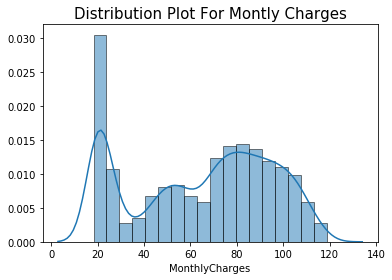

In [12]:
plt.title("Distribution Plot For Montly Charges",size=15)
sns.distplot(churn_df['MonthlyCharges'],hist_kws={'edgecolor':'black','alpha':.5})

##### Monthly charges span anywhere between dollar 18 to dollar 118 per customer with a huge proportion of customers on $20.

### Monthly Charges Distribution based on churn

Text(0.5, 1.0, 'Monthly Charges distribution based on churn')

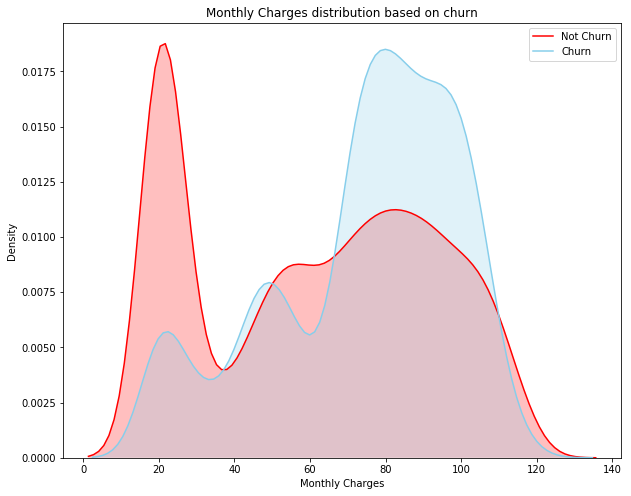

In [13]:
dims = (10, 8)
ax = plt.subplots(figsize=dims)

ax = sns.kdeplot(churn_df.MonthlyCharges[(churn_df["Churn"] == 'No') ],
                color="red", shade = True)
ax = sns.kdeplot(churn_df.MonthlyCharges[(churn_df["Churn"] == 'Yes') ],
                ax =ax, color="skyblue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Monthly Charges distribution based on churn')

##### According to the distribution the high probability of churns showing monthly charges span somewhere between 75 dollar to 118 dollar.

### Customer churn based on different features

In [112]:
def churnrate():
    features = ['PhoneService','MultipleLines','InternetService',
                'TechSupport','StreamingTV','StreamingMovies','Contract']
    for i, item in enumerate(features):
        if i < 3:
            fig1 = pd.crosstab(churn_df[item],churn_df.Churn,margins=True)
            fig1.drop('All',inplace=True)
            fig1.drop('All',axis=1, inplace=True)
            fig1.plot.bar()
            z= 'Customer Churned wrt ' + item
            plt.title(z,size=20)
        elif i >=3 and i < 6:
            fig1 = pd.crosstab(churn_df[item],churn_df.Churn,margins=True)
            fig1.drop('All',inplace=True)
            fig1.drop('All',axis=1, inplace=True)
            fig1.plot.bar()
            z= 'Customer Churned wrt ' + item
            plt.title(z,size=20)
        elif i < 9:
            fig1 = pd.crosstab(churn_df[item],churn_df.Churn,margins=True)
            fig1.drop('All',inplace=True)
            fig1.drop('All',axis=1, inplace=True)
            fig1.plot.bar()
            z= 'Customer Churned wrt ' + item
            plt.title(z,size=20)

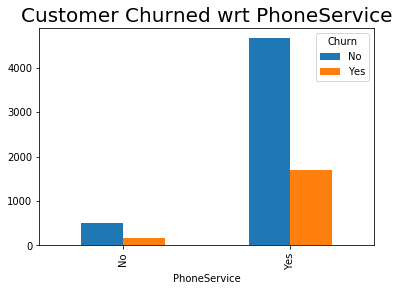

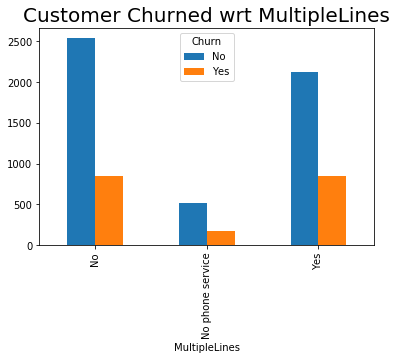

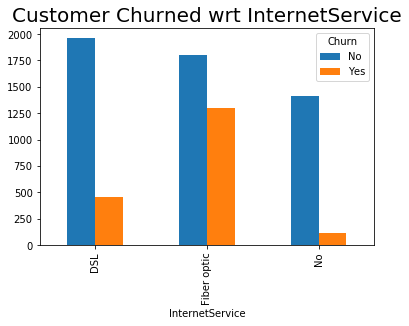

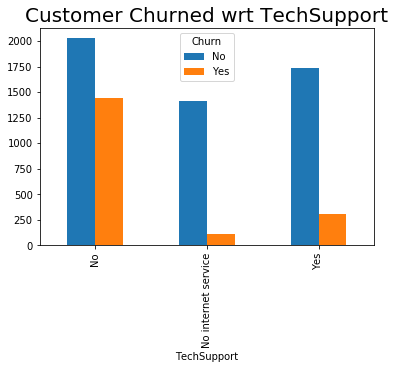

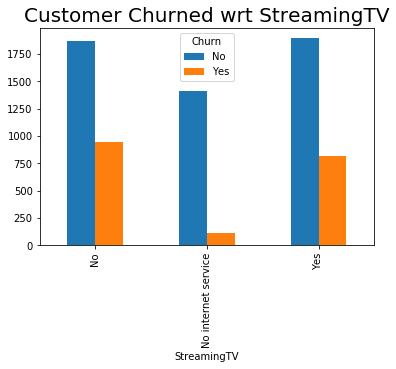

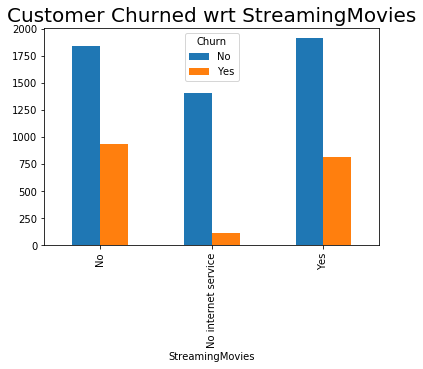

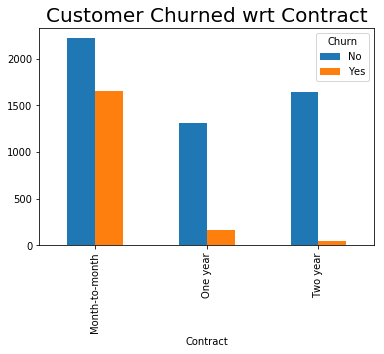

In [113]:
churnrate()

##### so above we can see that customers with a month-to-month connection have a very high probability to churn that too if they are using fiber optic in internet service.

## Data Manipulation

#### Let's check the the null values in the dataset

In [14]:
# Let's check if there is any Null value using isnull() method
churn_df.isnull().values.any() 


False

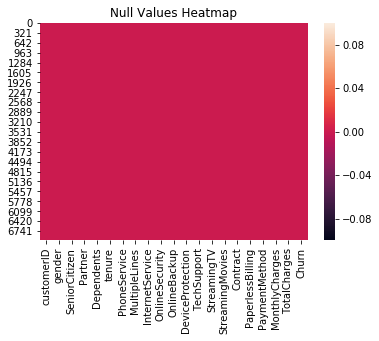

In [15]:
# this is the visual representation of null values present in data
sns.heatmap(churn_df.isnull())
plt.title('Null Values Heatmap')
plt.show()

##### we can clealry see that there is no null values present in the dataset

In [8]:
# creating a copy of dataset so that will not affect our original dataset.
churn_edit_df = churn_df.copy()


### Datatype conversion

In summary table the datatype of "TotalCharges" is showing object type which can create problem in our analysis so we need to convert it into a relevant datatype as our machine learning model can only work with actual numeric data. Therefore with the “to_numeric” function we can change the format and prepare the data for our machine learning model.

 

In [9]:
churn_edit_df['TotalCharges'] = pd.to_numeric(churn_edit_df['TotalCharges'],errors='coerce')

In [55]:
#churn_df['TotalCharges'] = churn_df.TotalCharges.astype(object)

In [10]:
# Now lets check the updated datatype in the summary table
churn_edit_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###### In above table it can seen that now the datatype of "TotalCharges" columns is converted from object type to float64 type.

In [11]:
# Let's check if there is any Null value using isnull() method
churn_edit_df.isnull().values.any() 

True

In [12]:
# checking total number of null values column wise
churn_edit_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

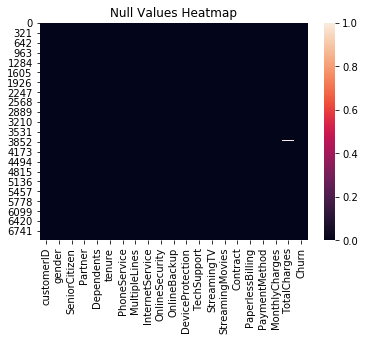

In [13]:
# this is the visual representation of null values present in data
sns.heatmap(churn_edit_df.isnull())
plt.title('Null Values Heatmap')
plt.show()

We Can clearly see that after changing the data type of 'Total Charges' column we got an 11 Null values in it. So first we need to fix this problem.

### Handling Null values

Imputation is a treatment method for missing value by filling it in using certain techniques. Can use mean, mode, or use predictive modeling. In this we will discuss the use of the fillna function from Pandas for this imputation.


In [15]:
# dealing will null values
churn_edit_df.fillna(churn_edit_df['TotalCharges'].median(), inplace=True)

In [16]:
churn_edit_df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

now, there are no more null values in the dataset.

#### Converting categorical Data into Numerical Values
As we cannot calculate anything with string values, we have to convert these values intro numeric ones. we are doing this with the help of LabelEncoder.fit_transform.

In [17]:

labelEncoder = LabelEncoder()

# Encoding categorical data --> gender Column
churn_edit_df['gender'] = labelEncoder.fit_transform(churn_edit_df['gender'])

# Encoding categorical data --> Partner Column
churn_edit_df['Partner'] = labelEncoder.fit_transform(churn_edit_df['Partner'])

# Encoding categorical data --> Dependents Column
churn_edit_df['Dependents'] = labelEncoder.fit_transform(churn_edit_df['Dependents'])

# Encoding categorical data --> PhoneService Column
churn_edit_df['PhoneService'] = labelEncoder.fit_transform(churn_edit_df['PhoneService'])

# Encoding categorical data --> Multiplelines Column
churn_edit_df['MultipleLines'] = labelEncoder.fit_transform(churn_edit_df['MultipleLines'])

# Encoding categorical data --> InternetService Column
churn_edit_df['InternetService'] = labelEncoder.fit_transform(churn_edit_df['InternetService'])

# Encoding categorical data --> Onlinesecurity Column
churn_edit_df['OnlineSecurity'] = labelEncoder.fit_transform(churn_edit_df['OnlineSecurity'])

# Encoding categorical data --> OnlineBackup Column
churn_edit_df['OnlineBackup'] = labelEncoder.fit_transform(churn_edit_df['OnlineBackup'])

# Encoding categorical data --> DeviceProtection Column
churn_edit_df['DeviceProtection'] = labelEncoder.fit_transform(churn_edit_df['DeviceProtection'])

# Encoding categorical data --> TechSupport Column
churn_edit_df['TechSupport'] = labelEncoder.fit_transform(churn_edit_df['TechSupport'])

# Encoding categorical data --> StreamingTV Column
churn_edit_df['StreamingTV'] = labelEncoder.fit_transform(churn_edit_df['StreamingTV'])

# Encoding categorical data --> StreamingMovies Column
churn_edit_df['StreamingMovies'] = labelEncoder.fit_transform(churn_edit_df['StreamingMovies'])

# Encoding categorical data --> Contract Column
churn_edit_df['Contract'] = labelEncoder.fit_transform(churn_edit_df['Contract'])

# Encoding categorical data --> PaperlessBilling Column
churn_edit_df['PaperlessBilling'] = labelEncoder.fit_transform(churn_edit_df['PaperlessBilling'])

# Encoding categorical data --> paymentMethod Column
churn_edit_df['PaymentMethod'] = labelEncoder.fit_transform(churn_edit_df['PaymentMethod'])

# Encoding categorical data --> Churn Column
churn_edit_df['Churn'] = labelEncoder.fit_transform(churn_edit_df['Churn'])

In [18]:
# Let's check the updated Dataset 
churn_edit_df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [19]:
churn_edit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


##### from above it can be seen that we have successfully converted our categorical data into numerical values 

##### Lets have a look on coorelation Matrix 

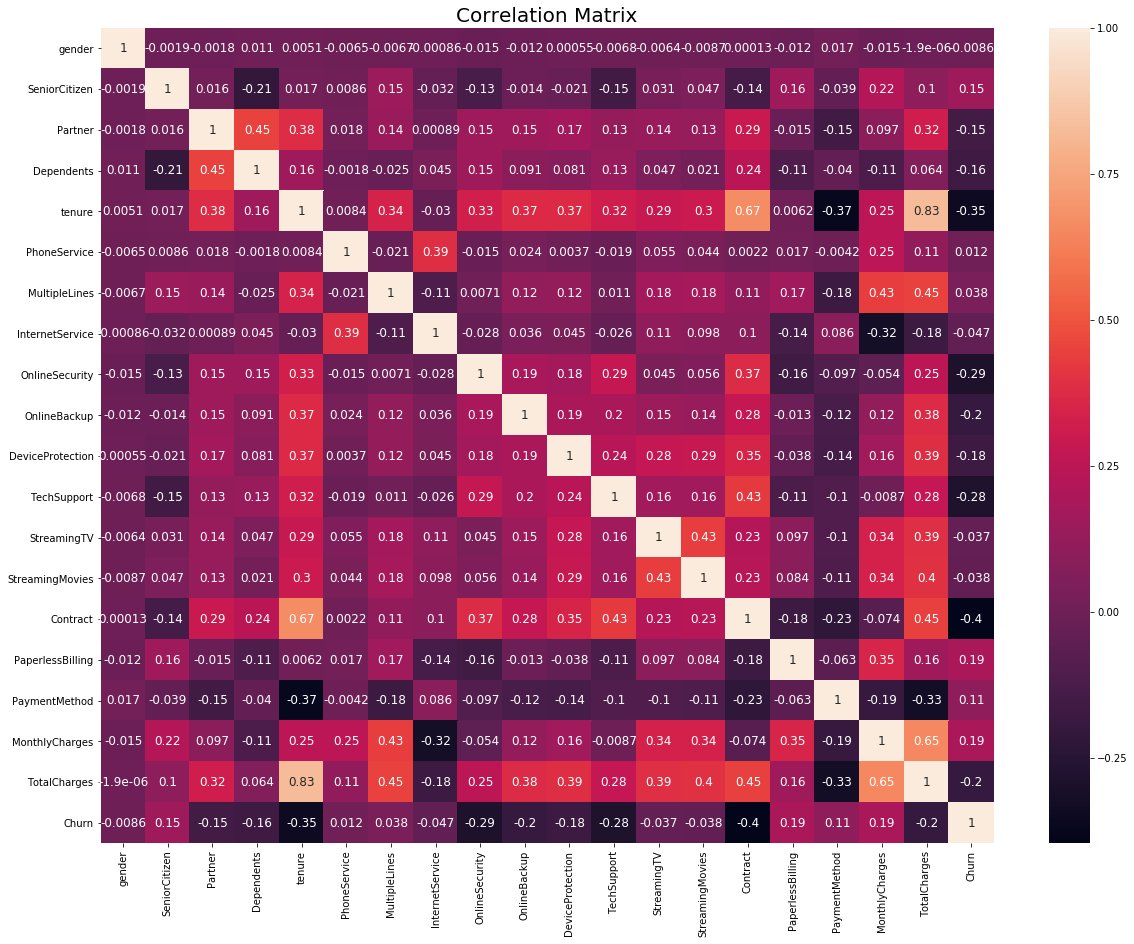

In [20]:
corr=churn_edit_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', size=20)
plt.show()

## Implement Machine Learning Models

### Logistic Regression Model 

Logistic Regression is one of the most used machine learning algorithm and mainly used when the dependent variable (here churn 1 or churn 0) is categorical. The independent variables in contrary can be categorical or numerical. 

In this first will Define and train the model and then test it.

In [21]:
# Importing required library for creating and traning our model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score

#### Now we are going to split our dataset into traning and testing sets.

We split this into two different datasets, one for the independent features — x, and one for the dependent variable — y (which is the last column). We’ll now split the dataset x into two separate sets — xTrain and xTest. Similarly, we’ll split the dataset y into two sets as well — yTrain and yTest. Doing this using the sklearn library is very simple.

Also we will split the dataset in a 80–20 ratio, which is a common practice in data science.

In [22]:
X = churn_edit_df.drop(['customerID','Churn','MonthlyCharges','TotalCharges'], axis=1)
y = churn_edit_df['Churn']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int32
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int32
 3   Dependents        7043 non-null   int32
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int32
 6   MultipleLines     7043 non-null   int32
 7   InternetService   7043 non-null   int32
 8   OnlineSecurity    7043 non-null   int32
 9   OnlineBackup      7043 non-null   int32
 10  DeviceProtection  7043 non-null   int32
 11  TechSupport       7043 non-null   int32
 12  StreamingTV       7043 non-null   int32
 13  StreamingMovies   7043 non-null   int32
 14  Contract          7043 non-null   int32
 15  PaperlessBilling  7043 non-null   int32
 16  PaymentMethod     7043 non-null   int32
dtypes: int32(15), int64(2)
memory usa

In [25]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
result = lr_model.fit(X_train, y_train)
result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

With the trained model we can now predict if a customer churned or not for our test dataset. The results are saved in “y_predict” and afterwards the accuracy score is measured and printed.

###### Evaluating Model 

In [26]:
y_pred=lr_model.predict(X_test)
print(y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

result1 = pd.DataFrame([['Logistic Regression',acc, prec, rec, f1]], columns = ['Model','Accuracy','Precision','Recall','F1 Score'])
result1

[1 0 0 ... 0 0 0]


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.801278,0.663158,0.506702,0.574468


###### we can see that we got an Accuracy of 0.80 for our logistic regression classifier.
It means that 80% of the cases our model predicted the right outcome for our binary classification problem. That’s considered quite good for a first run, especially when we look which impact each variable has and if that makes sense. So with the final objective to reduce churn and take the right preventing actions in time, we want to know which independent variables have to most influence on our predicted outcome. Therefore we set the coefficients in our model to zero and look at the weights of each variable.

In [27]:
# To get the weights of all the variables
weights = pd.Series(lr_model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

PaperlessBilling    0.549331
SeniorCitizen       0.323110
MultipleLines       0.267868
StreamingMovies     0.206565
StreamingTV         0.156499
PhoneService        0.121035
Partner             0.117317
PaymentMethod       0.012011
tenure             -0.026867
DeviceProtection   -0.037024
InternetService    -0.071635
gender             -0.073502
OnlineBackup       -0.127476
Dependents         -0.281815
TechSupport        -0.303806
OnlineSecurity     -0.353317
Contract           -0.884886
dtype: float64

It can be observed that some variables have a positive relation to our predicted variable and some have a negative relation.

Now will try to test with some other model to check which ML classification algorithm is giving us a better result.

### Decision Tree Classifier

In [28]:
from sklearn import tree

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
dt = dt.fit(X_train,y_train)


In [101]:
y_pred = dt.predict(X_test)
print(y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

result2 = pd.DataFrame([['Decision Tree',acc, prec, rec, f1]], columns = ['Model','Accuracy','Precision','Recall','F1 Score'])
result2


[1 0 0 ... 0 0 1]


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.799858,0.634218,0.576408,0.603933


### Random Forest 

In [102]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
rf = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
y_pred= rf.predict(X_test)
print(y_pred)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

result3 = pd.DataFrame([['Random Forest',acc, prec, rec, f1]], columns = ['Model','Accuracy','Precision','Recall','F1 Score'])
result3

[1 0 0 ... 0 0 0]


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.792761,0.650558,0.469169,0.545171


### Support Vector Machine 

In [104]:
from sklearn.svm import SVC
svm = SVC(C=0.025,random_state=42)
svm.fit(X_train,y_train)


SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [105]:
y_pred=svm.predict(X_test)
print(y_pred)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

result4 = pd.DataFrame([['Support Vactor Machine',acc, prec, rec, f1]], columns = ['Model','Accuracy','Precision','Recall','F1 Score'])
result4

[1 0 0 ... 0 0 1]


,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vactor Machine,0.779986,0.690909,0.30563,0.423792


### Model Evaluation Metrics

Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct prediction made as a ratio of total prediction.

We have tried 4 different Machine learning Classification algorithm for our model prediction and compared how each models are perfoming with the help of evaluation metics like accuracy, precision and f1 score.   

In [110]:
frame = [result1, result2, result3, result4]
evaluation_result = pd.concat(frame)
evaluation_result.reset_index(drop=True, inplace=True)
evaluation_result


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.801278,0.663158,0.506702,0.574468
1,Decision Tree,0.799858,0.634218,0.576408,0.603933
2,Random Forest,0.792761,0.650558,0.469169,0.545171
3,Support Vactor Machine,0.779986,0.690909,0.305630,0.423792


From above comparison table we can infer that the Logistic Regression model really perfomed follwed by Decision tree and Random forest with almost same percentage of accuracy i.e 80%.
Logistic Regression works really well on binary classification problems.

### Final Conclusions

So we have finally developed a model for predicting customer churn at fictious wireless company and have generate various useful insights about our data and how we can retain the customers.

###### Some important observations : 

- Most of the customers in the dataset are younger people.

- Most of the cusotmers seem to have phone service with monthly charges spanning between 18 dollar to 118 dollar per customer.

- customers with a month-to-month connection have a very high probability to churn.

- Most of the customers have Phone service out of which almost half of the customers have multiple lines.

- 3/4th of the customers have opted for internet service via Fiber optic and DSL Connections with almost half of the internet users subscribing to streaming TV and Movies.

we can retain our customers by converting our month-to-month contract customer into 1-year or 2-year contract customer and by reducing montlhy charges. also we can provide more DSL internet services to customer or try to convert the fiber optic service user as we have seen the plots that DSL customers have very less probability to churn.



We did not only find out which customers are likely to churn, but also which features have the most impact on a customer leaving.

Customer retention is one of the primary growth pillars for products with a subscription-based business model like telecommunication.
You need to engage with your customers. Being quiet and hoping that your customer does not leave will 100% end up in a churn sooner or later.
Look at their profile, identify characteristics and analyse past interactions with your product and then focus on the major factors that can be used as an advantage to both retain customers and attract new customers. Ask for feedback, communicate latest developments that might be from interest or educate them on new product features. Approach customers likely to churn, but make sure that you come up with relevant things that may fit their individual needs. It will create a feeling of being understood and bind them to you and your business.